In [3]:
import pandas as pd
import os

# STEP 1: Try loading the dataset safely
file_path = '../data/ecommerce_data.csv'

if os.path.exists(file_path):
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    print("✅ Loaded dataset with shape:", df.shape)

    # STEP 2: Clean the data
    df = df.dropna()
    df = df[df['Quantity'] > 0]
    df = df[df['UnitPrice'] > 0]
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

    # STEP 3: Add new columns
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
    df['OrderMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)
    df['OrderWeekday'] = df['InvoiceDate'].dt.day_name()

    # STEP 4: Save cleaned data
    df.to_csv('../data/cleaned_data.csv', index=False)
    print("✅ Saved cleaned_data.csv")

    # STEP 5: Customer features
    customer_df = df.groupby('CustomerID').agg({
        'InvoiceDate': ['max', 'min', 'count'],
        'TotalPrice': ['sum', 'mean']
    })
    customer_df.columns = ['LastPurchase', 'FirstPurchase', 'OrderCount', 'TotalSpent', 'AvgOrderValue']
    customer_df['Recency'] = (df['InvoiceDate'].max() - customer_df['LastPurchase']).dt.days
    customer_df = customer_df.reset_index()

    # STEP 6: Save customer features
    customer_df.to_csv('../data/customer_features.csv', index=False)
    print("✅ Saved customer_features.csv")

else:
    print(f"❌ File not found at path: {file_path}")


✅ Loaded dataset with shape: (541909, 8)
✅ Saved cleaned_data.csv
✅ Saved customer_features.csv


In [4]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.
C:\Users\Kadimi Jaswanth\AppData\Local\Temp\ipykernel_15936\549658602.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kadimi Jaswanth\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


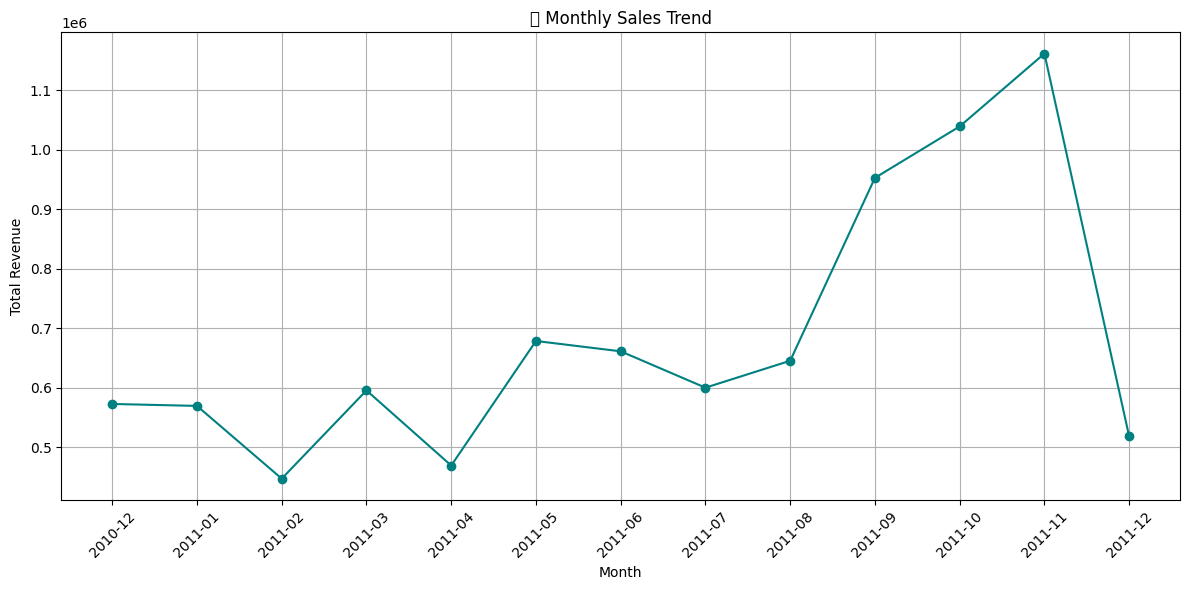

In [5]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby('OrderMonth')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['OrderMonth'], monthly_sales['TotalPrice'], marker='o', color='teal')
plt.xticks(rotation=45)
plt.title("📈 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\Kadimi Jaswanth\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


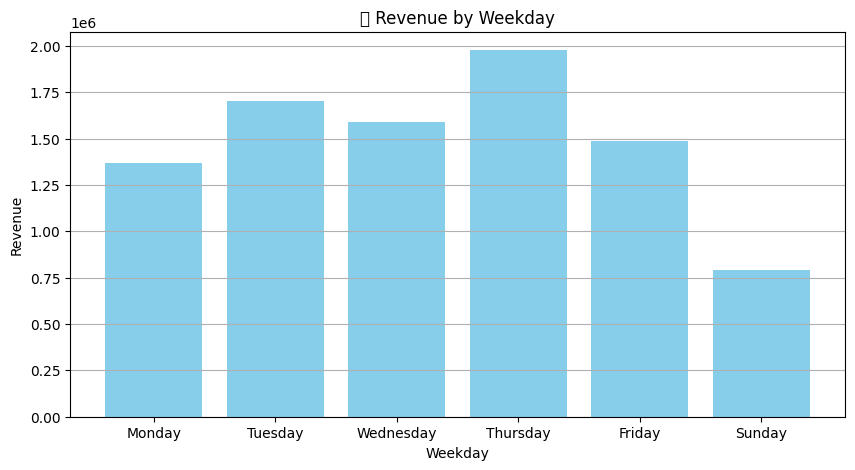

In [6]:
weekday_sales = df.groupby('OrderWeekday')['TotalPrice'].sum().reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales['OrderWeekday'] = pd.Categorical(weekday_sales['OrderWeekday'], categories=days, ordered=True)
weekday_sales = weekday_sales.sort_values('OrderWeekday')

plt.figure(figsize=(10, 5))
plt.bar(weekday_sales['OrderWeekday'], weekday_sales['TotalPrice'], color='skyblue')
plt.title("📅 Revenue by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Revenue")
plt.grid(axis='y')
plt.show()


c:\Users\Kadimi Jaswanth\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


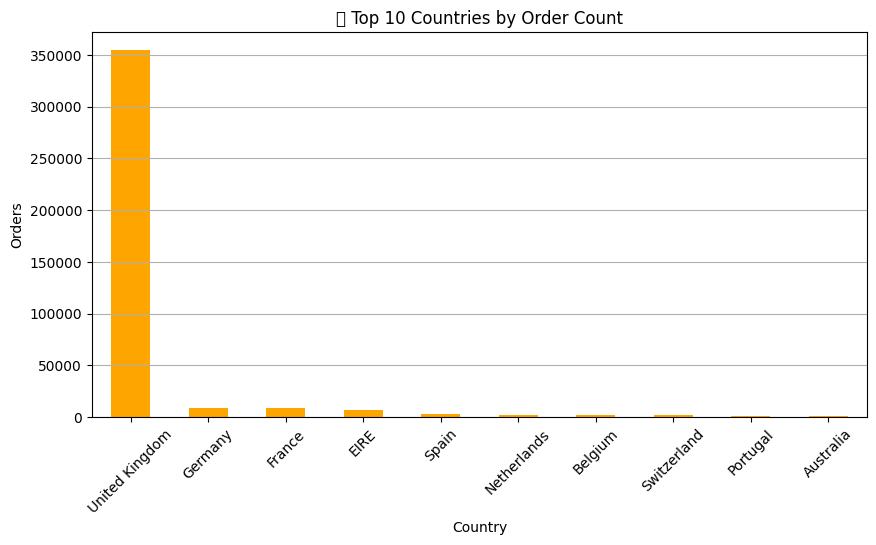

In [7]:
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_countries.plot(kind='bar', color='orange')
plt.title("🌍 Top 10 Countries by Order Count")
plt.xlabel("Country")
plt.ylabel("Orders")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


c:\Users\Kadimi Jaswanth\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


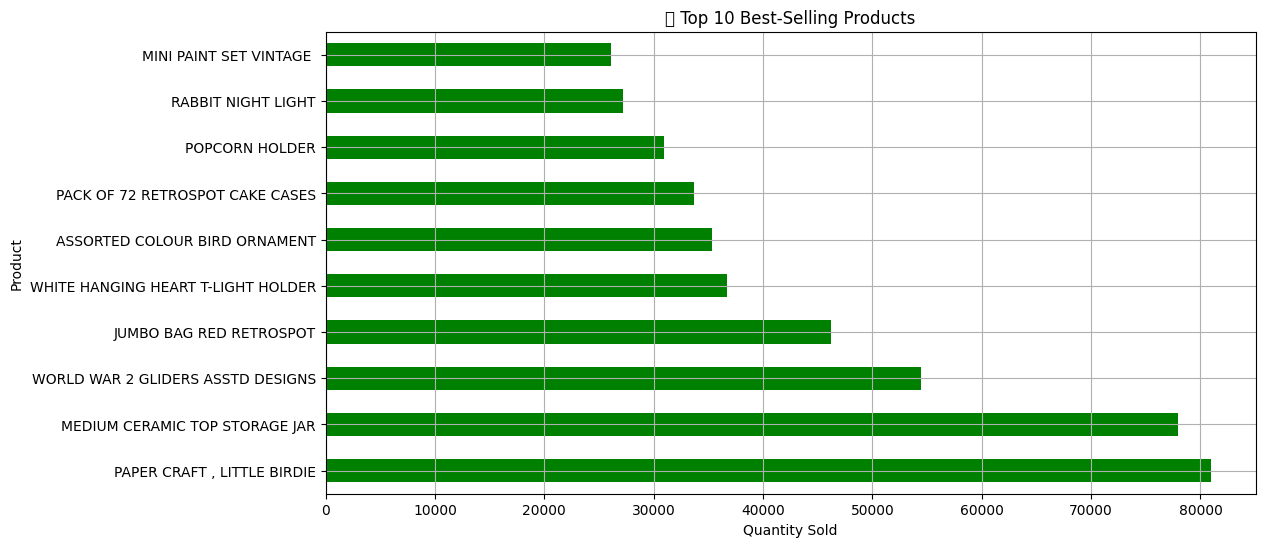

In [8]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='barh', color='green')
plt.title("🛒 Top 10 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")
plt.grid(True)
plt.show()


In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(customer_df['TotalSpent'], bins=50, kde=True, color='purple')
plt.title("💰 Distribution of Total Customer Spend")
plt.xlabel("Total Spent")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()
